# Batch augmentation
Notebook to visualize data augmentation

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import yaml
import os
import carreno.processing.transforms as tfs
from carreno.nn.generators import Generator

In [29]:
# File paths
with open("../config.yml") as f:
    config = yaml.safe_load(f)

prefix = ".."
filenames = os.listdir(os.path.join(prefix, config['VOLUME']['input']))
join = lambda dir: [os.path.join(prefix, dir,file) for file in filenames]

x = join(config['VOLUME']['input'])
y = join(config['VOLUME']['target'])
w = join(config['VOLUME']['weight'])
ys = join(config['VOLUME']['soft_target'])
ws = join(config['VOLUME']['soft_weight'])

print("nb of volume", len(x))

nb of volume 10


In [17]:
# Augmentation
shape = [1] + config['PREPROCESS']['patch'][1:]
n_color_ch = 1

train_aug = tfs.Compose(transforms=[
    tfs.Read(),
    tfs.PadResize(shape=shape, mode='reflect'),
    tfs.Sample(shape=shape),
    tfs.Standardize(),
    tfs.Flip(axis=1, p=0.5),
    tfs.Flip(axis=2, p=0.5),
    tfs.Rotate([-30, 30], axes=[1,2], order=1, mode='reflect', p=0.5),
    tfs.Squeeze(axis=0),
    tfs.Stack(axis=-1, n=n_color_ch),
])
    
test_aug = tfs.Compose(transforms=[
    tfs.Read(),
    tfs.PadResize(shape=shape, mode='reflect'),
    tfs.Sample(shape=shape),
    tfs.Standardize(),
    tfs.Squeeze(axis=0),
    tfs.Stack(axis=-1, n=n_color_ch),
])

In [18]:
train_gen = Generator( x[:6] * 2,  y[:6] * 2,  w[:6] * 2, size=12, augmentation=train_aug, shuffle=False)
valid_gen = Generator(x[6:8] * 2, y[6:8] * 2, w[6:8] * 2, size=4,  augmentation=test_aug,  shuffle=False)
test_gen  = Generator( x[8:] * 2,  y[8:] * 2,  w[8:] * 2, size=4,  augmentation=test_aug,  shuffle=False)

In [6]:
for xpath, ypath, wpath in zip(train_gen.x, train_gen.y, train_gen.w):
    print(xpath, ypath, wpath)

..\data/dataset/input\ctrl1.tif ..\data/dataset/target\ctrl1.tif ..\data/dataset/weight\ctrl1.tif
..\data/dataset/input\ctrl2.tif ..\data/dataset/target\ctrl2.tif ..\data/dataset/weight\ctrl2.tif
..\data/dataset/input\ctrl3.tif ..\data/dataset/target\ctrl3.tif ..\data/dataset/weight\ctrl3.tif
..\data/dataset/input\ctrl4.tif ..\data/dataset/target\ctrl4.tif ..\data/dataset/weight\ctrl4.tif
..\data/dataset/input\slik1.tif ..\data/dataset/target\slik1.tif ..\data/dataset/weight\slik1.tif
..\data/dataset/input\slik2.tif ..\data/dataset/target\slik2.tif ..\data/dataset/weight\slik2.tif
..\data/dataset/input\ctrl1.tif ..\data/dataset/target\ctrl1.tif ..\data/dataset/weight\ctrl1.tif
..\data/dataset/input\ctrl2.tif ..\data/dataset/target\ctrl2.tif ..\data/dataset/weight\ctrl2.tif
..\data/dataset/input\ctrl3.tif ..\data/dataset/target\ctrl3.tif ..\data/dataset/weight\ctrl3.tif
..\data/dataset/input\ctrl4.tif ..\data/dataset/target\ctrl4.tif ..\data/dataset/weight\ctrl4.tif
..\data/dataset/inpu

In [24]:
xtrn, ytrn, wtrn = train_gen.__getitem__(0)
print("Number of subjects in training batch :", len(xtrn), "/", len(ytrn), "/", len(wtrn))

xval, yval, wval = valid_gen.__getitem__(0)
print("Number of subjects in training batch :", len(xval), "/", len(yval), "/", len(wval))

Number of subjects in training batch : 12 / 12 / 12
Number of subjects in training batch : 4 / 4 / 4


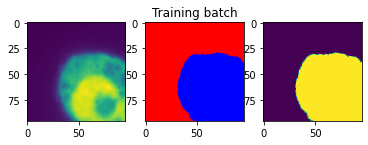

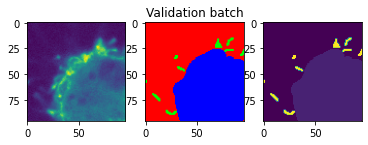

In [25]:
plt.subplot(131)
plt.imshow(xtrn[0])
plt.subplot(132)
plt.title('Training batch')
plt.imshow(ytrn[0])
plt.subplot(133)
plt.imshow(wtrn[0])
plt.show()

plt.subplot(131)
plt.imshow(xval[0])
plt.subplot(132)
plt.title('Validation batch')
plt.imshow(yval[0])
plt.subplot(133)
plt.imshow(wval[0])
plt.show()

Seems to be working fine, let's visualize each augmentations

READ
Shapes : [(52, 234, 213), (52, 234, 213, 3), (52, 234, 213)]


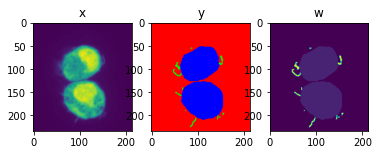

In [37]:
print("READ")
read = tfs.Read()(x[0], y[0], w[0])
mid = read[0].shape[0] // 2
print("Shapes :", [i.shape for i in read])

plt.subplot(131)
plt.title('x')
plt.imshow(read[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(read[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(read[2][mid])
plt.show()

PAD
Shapes : [(52, 234, 213), (52, 234, 213, 3), (52, 234, 213)]


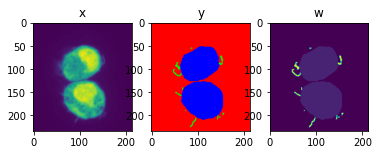

In [38]:
print("PAD")
pad = tfs.PadResize(shape=shape, mode='reflect')(*read)
mid = pad[0].shape[0] // 2
print("Shapes :", [i.shape for i in pad])

plt.subplot(131)
plt.title('x')
plt.imshow(pad[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(pad[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(pad[2][mid])
plt.show()

SAMPLE
Shapes : [(1, 96, 96), (1, 96, 96, 3), (1, 96, 96)]


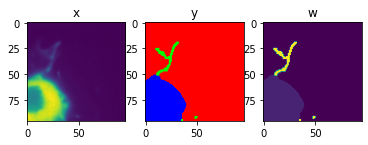

In [39]:
print("SAMPLE")
sample = tfs.Sample(shape=shape)(*pad)
mid = sample[0].shape[0] // 2
print("Shapes :", [i.shape for i in sample])

plt.subplot(131)
plt.title('x')
plt.imshow(sample[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(sample[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(sample[2][mid])
plt.show()

STANDARDIZE
Shapes : [(1, 96, 96), (1, 96, 96, 3), (1, 96, 96)]
X range before [0.0, 0.99215686] and after [-0.52495575, 0.4672011]


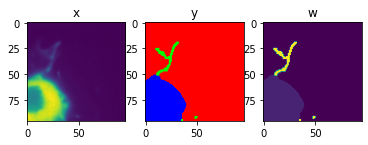

In [42]:
print("STANDARDIZE")
std = tfs.Standardize()(*sample)
mid = std[0].shape[0] // 2
print("Shapes :", [i.shape for i in std])
print("X range before {} and after {}".format([sample[0].min(), sample[0].max()], [std[0].min(), std[0].max()]))

plt.subplot(131)
plt.title('x')
plt.imshow(std[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(std[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(std[2][mid])
plt.show()

FLIP 1
Shapes : [(1, 96, 96), (1, 96, 96, 3), (1, 96, 96)]


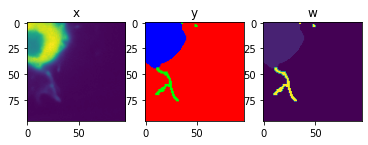

In [43]:
print("FLIP 1")
flip1 = tfs.Flip(axis=1, p=1)(*std)
mid = flip1[0].shape[0] // 2
print("Shapes :", [i.shape for i in flip1])

plt.subplot(131)
plt.title('x')
plt.imshow(flip1[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(flip1[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(flip1[2][mid])
plt.show()

FLIP 2
Shapes : [(1, 96, 96), (1, 96, 96, 3), (1, 96, 96)]


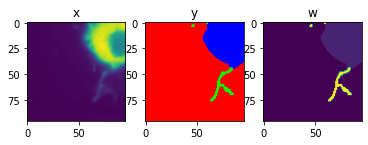

In [44]:
print("FLIP 2")
flip2 = tfs.Flip(axis=2, p=1)(*flip1)
mid = flip2[0].shape[0] // 2
print("Shapes :", [i.shape for i in flip2])

plt.subplot(131)
plt.title('x')
plt.imshow(flip2[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(flip2[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(flip2[2][mid])
plt.show()

ROTATE
Shapes : [(1, 96, 96), (1, 96, 96, 3), (1, 96, 96)]


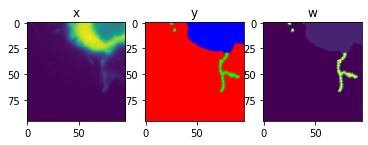

In [45]:
print("ROTATE")
rotate = tfs.Rotate([20, 30], axes=[1,2], order=1, mode='reflect', p=1)(*flip2)
mid = rotate[0].shape[0] // 2
print("Shapes :", [i.shape for i in rotate])

plt.subplot(131)
plt.title('x')
plt.imshow(rotate[0][mid])
plt.subplot(132)
plt.title('y')
plt.imshow(rotate[1][mid])
plt.subplot(133)
plt.title('w')
plt.imshow(rotate[2][mid])
plt.show()

SQUEEZE
Shapes : [(96, 96), (96, 96, 3), (96, 96)]


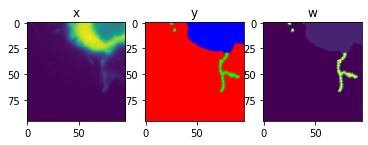

In [46]:
print("SQUEEZE")
squeeze = tfs.Squeeze(axis=0)(*rotate)
print("Shapes :", [i.shape for i in squeeze])

plt.subplot(131)
plt.title('x')
plt.imshow(squeeze[0])
plt.subplot(132)
plt.title('y')
plt.imshow(squeeze[1])
plt.subplot(133)
plt.title('w')
plt.imshow(squeeze[2])
plt.show()

STACK
Shapes : [(96, 96, 1), (96, 96, 3), (96, 96)]


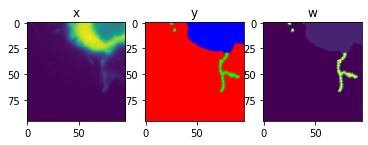

In [47]:
print("STACK")
stack = tfs.Stack(axis=-1, n=n_color_ch)(*squeeze)
print("Shapes :", [i.shape for i in stack])

plt.subplot(131)
plt.title('x')
plt.imshow(stack[0])
plt.subplot(132)
plt.title('y')
plt.imshow(stack[1])
plt.subplot(133)
plt.title('w')
plt.imshow(stack[2])
plt.show()

By implementing my own augmentation, I don't have to deal with Volumentations lack of documentation and bugs.

I also get to support 2D and 3D with the same module vs handling Albumentations and Volumentations.